In [148]:
%matplotlib inline
from collections import defaultdict, Counter
import glob
import os
import json

from IPython.core.display import HTML, Image
from matplotlib_venn import venn3
import pandas as pd
import pybedtools
import pysam
import gspread
from gscripts.general import parsers
from gscripts.general import dataviz
%load_ext autoreload
import numpy as np
%autoreload 2
reload(parsers)
reload(pybedtools)
import seaborn as sns
import matplotlib
from oauth2client.client import SignedJwtAssertionCredentials
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

sns.set_style("ticks")

img_dir = "/home/gpratt/Dropbox/encode_integration/qc_work/"
from maps.density import Map, intervals, normalization_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [155]:
se_dir = "/projects/ps-yeolab3/bay001/maps/current/se_nr"

In [156]:
ip_neg = pd.read_csv(se_dir + "/291_01_PRPF8.merged.r2.PRPF8-BGHLV17-HepG2-SE.MATS.JunctionCountOnly.negative.nr.ip.raw_density.csv", index_col=0)
ip_pos = pd.read_csv(se_dir + "/291_01_PRPF8.merged.r2.PRPF8-BGHLV17-HepG2-SE.MATS.JunctionCountOnly.positive.nr.ip.raw_density.csv", index_col=0)

ip_neg = normalization_functions.clean(ip_neg)
ip_pos = normalization_functions.clean(ip_pos)

input_neg = pd.read_csv(se_dir + "/291_01_PRPF8.merged.r2.PRPF8-BGHLV17-HepG2-SE.MATS.JunctionCountOnly.negative.nr.input.raw_density.csv", index_col=0)
input_pos = pd.read_csv(se_dir + "/291_01_PRPF8.merged.r2.PRPF8-BGHLV17-HepG2-SE.MATS.JunctionCountOnly.positive.nr.input.raw_density.csv", index_col=0)

input_neg = normalization_functions.clean(input_neg)
input_pos = normalization_functions.clean(input_pos)

#Subtract then mean
Don'T FORGET TO SET YOUR AXIS'

In [157]:
normed_neg = ip_neg - input_neg
normed_pos = ip_pos - input_pos

ip_neg_mean = ip_neg.mean()
ip_pos_mean = ip_pos.mean()

input_neg_mean = input_neg.mean()
input_pos_mean = input_pos.mean()

normed_neg_mean = normed_neg.mean()
normed_pos_mean = normed_pos.mean()

ip_neg_density = intervals.split(ip_neg_mean, 4)
ip_pos_density = intervals.split(ip_pos_mean, 4)

input_neg_density = intervals.split(input_neg_mean, 4)
input_pos_density = intervals.split(input_pos_mean, 4)

normed_neg_density = intervals.split(normed_neg_mean, 4)
normed_pos_density = intervals.split(normed_pos_mean, 4)

In [161]:
raw_exc = sns.color_palette("Blues", 2)[0]
normalized_exc = sns.color_palette("Blues", 2)[1]

raw_inc = sns.color_palette("Reds", 2)[0]
normalized_inc = sns.color_palette("Reds", 2)[1]

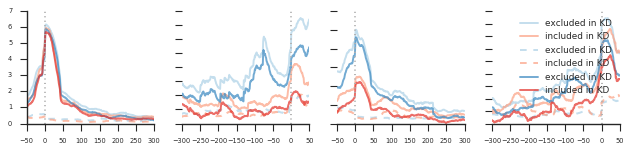

In [163]:
num_rows = 1 
num_cols = 4
width = 8
with dataviz.Figure(os.path.join(img_dir, "read_density.svg"), figsize=(width, width/4)) as fig:
    ax = fig.add_subplot(num_rows, num_cols,1)
    fi = range(-50, 300)
    ax.plot(fi, ip_neg_density[0], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(fi, ip_pos_density[0], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(fi, input_neg_density[0], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(fi, input_pos_density[0], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(fi, normed_neg_density[0], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(fi, normed_pos_density[0], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]
    [tick.set_fontsize(6) for tick in ax.get_yticklabels()]


    sns.despine(ax=ax)
    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 2)
    si = range(-300, 50)
    ax.plot(si, ip_neg_density[1], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, ip_pos_density[1], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, input_neg_density[1], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(si, input_pos_density[1], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(si, normed_neg_density[1], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normed_pos_density[1], label="included in KD", color=normalized_inc, alpha=.7)

    
    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]

    sns.despine(ax=ax, left=True)

    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 3)
    si = range(-50, 300)
    ax.plot(si, ip_neg_density[2], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, ip_pos_density[2], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, input_neg_density[2], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(si, input_pos_density[2], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(si, normed_neg_density[2], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normed_pos_density[2], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]

    sns.despine(ax=ax, left=True)
    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 4)
    si = range(-300, 50)
    ax.plot(si, ip_neg_density[3], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, ip_pos_density[3], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, input_neg_density[3], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(si, input_pos_density[3], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(si, normed_neg_density[3], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normed_pos_density[3], label="included in KD", color=normalized_inc, alpha=.7)
    
    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]
    sns.despine(ax=ax, left=True)
    ax.legend(fontsize=8)

In [ ]:
# Mean then subtract

In [164]:
normed_neg_mean = ip_neg.mean() - input_neg.mean()
normed_pos_mean = ip_pos.mean() - input_pos.mean()

ip_neg_mean = ip_neg.mean()
ip_pos_mean = ip_pos.mean()

input_neg_mean = input_neg.mean()
input_pos_mean = input_pos.mean()

ip_neg_density = intervals.split(ip_neg_mean, 4)
ip_pos_density = intervals.split(ip_pos_mean, 4)

input_neg_density = intervals.split(input_neg_mean, 4)
input_pos_density = intervals.split(input_pos_mean, 4)

normed_neg_density = intervals.split(normed_neg_mean, 4)
normed_pos_density = intervals.split(normed_pos_mean, 4)

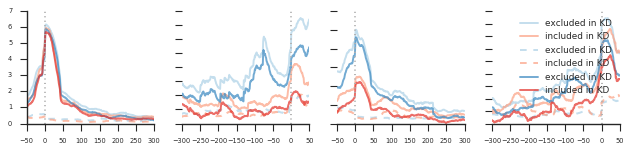

In [165]:
num_rows = 1 
num_cols = 4
width = 8
with dataviz.Figure(os.path.join(img_dir, "read_density.svg"), figsize=(width, width/4)) as fig:
    ax = fig.add_subplot(num_rows, num_cols,1)
    fi = range(-50, 300)
    ax.plot(fi, ip_neg_density[0], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(fi, ip_pos_density[0], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(fi, input_neg_density[0], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(fi, input_pos_density[0], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(fi, normed_neg_density[0], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(fi, normed_pos_density[0], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]
    [tick.set_fontsize(6) for tick in ax.get_yticklabels()]


    sns.despine(ax=ax)
    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 2)
    si = range(-300, 50)
    ax.plot(si, ip_neg_density[1], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, ip_pos_density[1], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, input_neg_density[1], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(si, input_pos_density[1], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(si, normed_neg_density[1], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normed_pos_density[1], label="included in KD", color=normalized_inc, alpha=.7)

    
    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]

    sns.despine(ax=ax, left=True)

    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 3)
    si = range(-50, 300)
    ax.plot(si, ip_neg_density[2], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, ip_pos_density[2], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, input_neg_density[2], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(si, input_pos_density[2], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(si, normed_neg_density[2], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normed_pos_density[2], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]

    sns.despine(ax=ax, left=True)
    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 4)
    si = range(-300, 50)
    ax.plot(si, ip_neg_density[3], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, ip_pos_density[3], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, input_neg_density[3], label="excluded in KD", color=raw_exc, linestyle="--", alpha=.7)
    ax.plot(si, input_pos_density[3], label="included in KD", color=raw_inc, linestyle="--", alpha=.7)
    
    ax.plot(si, normed_neg_density[3], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normed_pos_density[3], label="included in KD", color=normalized_inc, alpha=.7)
    
    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]
    sns.despine(ax=ax, left=True)
    ax.legend(fontsize=8)

# norm by PDF rather than raw data

In [211]:
ip_neg = pd.read_csv(se_dir + "/203_02_HNRNPC.merged.r2.HNRNPC-BGHLV20-HepG2-SE.MATS.JunctionCountOnly.negative.nr.ip.raw_density.csv", index_col=0)
ip_pos = pd.read_csv(se_dir + "/203_02_HNRNPC.merged.r2.HNRNPC-BGHLV20-HepG2-SE.MATS.JunctionCountOnly.positive.nr.ip.raw_density.csv", index_col=0)

input_pos = pd.read_csv(se_dir + "/203_02_HNRNPC.merged.r2.HNRNPC-BGHLV20-HepG2-SE.MATS.JunctionCountOnly.positive.nr.input.raw_density.csv", index_col=0)
input_neg = pd.read_csv(se_dir + "/203_02_HNRNPC.merged.r2.HNRNPC-BGHLV20-HepG2-SE.MATS.JunctionCountOnly.negative.nr.input.raw_density.csv", index_col=0)

normalized_pos = pd.read_csv(se_dir + "/203_02_HNRNPC.merged.r2.HNRNPC-BGHLV20-HepG2-SE.MATS.JunctionCountOnly.positive.nr.normalize_and_per_region_subtract.csv", index_col=0)
normalized_neg = pd.read_csv(se_dir + "/203_02_HNRNPC.merged.r2.HNRNPC-BGHLV20-HepG2-SE.MATS.JunctionCountOnly.negative.nr.normalize_and_per_region_subtract.csv", index_col=0)

In [212]:
normed_neg = ip_neg - input_neg
normed_pos = ip_pos - input_pos

normed_neg_mean = normed_neg.mean()
normed_pos_mean = normed_pos.mean()

normalized_pos_mean = normalized_pos.mean()
normalized_neg_mean = normalized_neg.mean()

normed_neg_density = intervals.split(normed_neg_mean, 4)
normed_pos_density = intervals.split(normed_pos_mean, 4)

normalized_pos_density = intervals.split(normalized_pos_mean, 4)
normalized_neg_density = intervals.split(normalized_neg_mean, 4)

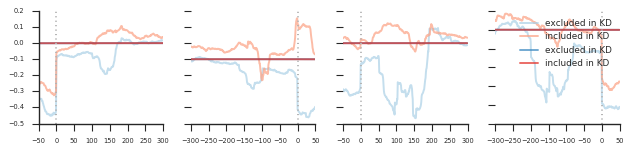

In [216]:
num_rows = 1 
num_cols = 4
width = 8
with dataviz.Figure(os.path.join(img_dir, "read_density.svg"), figsize=(width, width/4)) as fig:
    ax = fig.add_subplot(num_rows, num_cols,1)
    fi = range(-50, 300)
    
    ax.plot(fi, normed_neg_density[0], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(fi, normed_pos_density[0], label="included in KD", color=raw_inc, alpha=.7)

    ax.plot(fi, normalized_pos_density[0], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(fi, normalized_neg_density[0], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]
    [tick.set_fontsize(6) for tick in ax.get_yticklabels()]


    sns.despine(ax=ax)
    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 2)
    si = range(-300, 50)
    
    ax.plot(si, normed_neg_density[1], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, normed_pos_density[1], label="included in KD", color=raw_inc, alpha=.7)

    ax.plot(si, normalized_pos_density[1], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normalized_neg_density[1], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]

    sns.despine(ax=ax, left=True)

    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 3)
    si = range(-50, 300)
    
    ax.plot(si, normed_neg_density[2], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, normed_pos_density[2], label="included in KD", color=raw_inc, alpha=.7)

    ax.plot(si, normalized_pos_density[2], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normalized_neg_density[2], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]

    sns.despine(ax=ax, left=True)
    #ax.legend()
    
    ax = fig.add_subplot(num_rows, num_cols, 4)
    si = range(-300, 50)
    
    ax.plot(si, normed_neg_density[3], label="excluded in KD", color=raw_exc, alpha=.7)
    ax.plot(si, normed_pos_density[3], label="included in KD", color=raw_inc, alpha=.7)
    
    ax.plot(si, normalized_pos_density[3], label="excluded in KD", color=normalized_exc, alpha=.7)
    ax.plot(si, normalized_neg_density[3], label="included in KD", color=normalized_inc, alpha=.7)

    ax.axvline(0, linestyle="dotted", color=".7")
    ax.set_yticklabels([])
    [tick.set_fontsize(6) for tick in ax.get_xticklabels()]
    sns.despine(ax=ax, left=True)
    ax.legend(fontsize=8)

In [210]:
normalized_pos_density[3]

1050   -1.256777e-06
1051   -2.862689e-07
1052    5.050225e-06
1053    1.361442e-06
1054    1.100017e-05
1055    6.508907e-06
1056    4.972008e-06
1057    7.057248e-06
1058    8.258109e-06
1059    8.931874e-06
1060    8.170300e-07
1061    5.929404e-06
1062    1.447714e-05
1063    8.655011e-06
1064    7.938915e-06
1065    7.006144e-06
1066    3.553480e-06
1067    4.060904e-06
1068    8.213570e-06
1069    4.073151e-06
1070   -5.313275e-06
1071   -7.125255e-06
1072   -7.964323e-07
1073   -7.467935e-06
1074   -9.926368e-06
1075   -9.370113e-06
1076   -3.016566e-06
1077   -1.211227e-06
1078    8.186139e-06
1079    1.584548e-05
            ...     
1370   -6.462517e-04
1371   -6.457551e-04
1372   -6.440376e-04
1373   -6.436371e-04
1374   -6.357012e-04
1375   -6.386127e-04
1376   -6.461635e-04
1377   -6.374950e-04
1378   -6.408015e-04
1379   -6.323241e-04
1380   -6.269994e-04
1381   -6.183294e-04
1382   -6.200240e-04
1383   -6.225778e-04
1384   -6.291918e-04
1385   -6.315525e-04
1386   -6.202